In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter

In [38]:
# Read the data and parse the PROF_DATE_TIME_LOCAL column to a datetime object
data = pd.read_csv('../data/concat/MWRA_TA_DIC_2017_to_2022.csv'
                   , parse_dates=['PROF_DATE_TIME_LOCAL'])
date_form = DateFormatter("%m/%y")

In [39]:
data.columns

Index(['STUDY_ID', 'EVENT_ID', 'STAT_ID', 'ORDERED_DEPTH_CODE', 'SAMPLE_ID',
       'SAMPLE_DEPTH_TOP', 'SAMPLE_DEPTH_BOTTOM', 'LATITUDE', 'LONGITUDE',
       'VAL_QUAL', 'Data Source', 'PROF_DATE_TIME_LOCAL', 'SAMPLE_DEPTH_CODE',
       'DEPTH (m)', 'CONDTVY (mS/cm)', 'DISS_OXYGEN (mg/L)',
       'FLUORESCENCE (ug/L)', 'FLU_RAW (ug/L)', 'PCT_SAT (PCT)', 'pH ()',
       'SAL (PSU)', 'SIGMA_T ()', 'TEMP (C)', 'TRANS (m-1)', 'Station_D',
       'Air Irradiance', 'Water Irradiance', 'TA in (mmol/kgSW)',
       'TCO2 in (mmol/kgSW)', 't(oC) out', 'P (dbars) out', 'pH out',
       'fCO2 out (matm)', 'pCO2 out (matm)', 'HCO3 out (mmol/kgSW)',
       'CO3 out (mmol/kgSW)', 'CO2 out (mmol/kgSW)', 'B Alk out (mmol/kgSW)',
       'OH out (mmol/kgSW)', 'P Alk out (mmol/kgSW)',
       'Si Alk out (mmol/kgSW) ', 'Revelle out', 'WCa out', 'WAr out',
       'xCO2 out (dry at 1 atm) (ppm)', 'Field Replicate',
       'VINDTA Sample Name', 'Sampled Bottle Name', 'Sampling Date',
       'Sampling Depth',

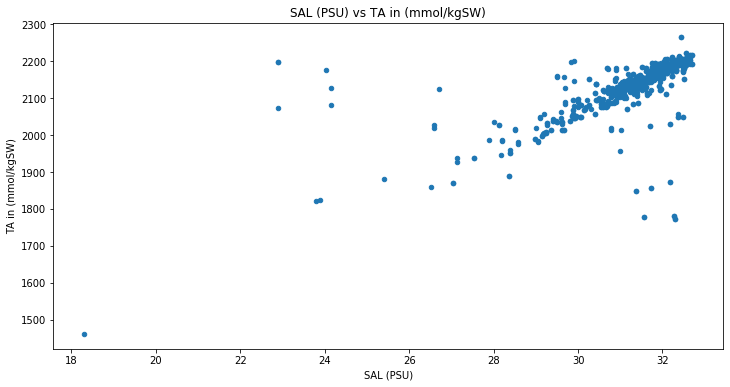

In [41]:
sal_and_ta = data[(data['SAL (PSU)'].notnull()) & (data['TA in (mmol/kgSW)'].notnull())]
# Plot 'SAL (PSU)' vs 'TA in (mmol/kgSW)'
sal_and_ta.plot(x='SAL (PSU)', y='TA in (mmol/kgSW)', kind = 'scatter', figsize=(12, 6))
plt.xlabel('SAL (PSU)')
plt.ylabel('TA in (mmol/kgSW)')
plt.title('SAL (PSU) vs TA in (mmol/kgSW)')
plt.show()

In [ ]:
# Stacked graphs of pH, TA, DIC for each station
stations = data['STAT_ID'].unique()
for stat_id in stations:
  stat_data = data[data['STAT_ID'] == stat_id]
  ph = stat_data[stat_data['pH ()'].notnull() & data['VAL_QUAL'].isnull()]
  ta  = stat_data[stat_data['TA in (mmol/kgSW)'].notnull()]
  dic = stat_data[stat_data['TCO2 in (mmol/kgSW)'].notnull()]

  fig, ax = plt.subplots(3, 1, figsize=(10, 10))
  fig.suptitle(stat_id)
  
  ax[0].plot(ph['PROF_DATE_TIME_LOCAL'], ph['pH ()'], 'o', color='red')
  ax[0].set_ylabel('pH')
  ax[0].xaxis.set_major_formatter(date_form)

  ax[1].plot(ta['PROF_DATE_TIME_LOCAL'], ta['TA in (mmol/kgSW)'], 'o', color='blue')
  ax[1].set_ylabel('TA in (mmol/kgSW)')
  ax[1].xaxis.set_major_formatter(date_form)

  ax[2].plot(dic['PROF_DATE_TIME_LOCAL'], dic['TCO2 in (mmol/kgSW)'], 'o', color='green')
  ax[2].set_ylabel('TCO2 in (mmol/kgSW)')
  ax[2].xaxis.set_major_formatter(date_form)

  fig_path = '../figures/' + stat_id + '.png'
  fig.savefig(fig_path)
  plt.close(fig)

In [ ]:
# Plot bad pH values in red, good in green, station-wise
ph = data[(data['pH ()'].notnull()) & (data['VAL_QUAL'].isnull())]
bad_ph = data[(data['pH ()'].notnull()) & (data['VAL_QUAL'].notnull())]

stations = ph['STAT_ID'].unique()
for stat_id in stations:
  fig, ax = plt.subplots(1, 1, figsize=(10, 10))
  fig.suptitle(stat_id)
  ax.plot(ph[ph['STAT_ID'] == stat_id]['PROF_DATE_TIME_LOCAL'], ph[ph['STAT_ID'] == stat_id]['pH ()'], 'o', color='green')
  ax.plot(bad_ph[bad_ph['STAT_ID'] == stat_id]['PROF_DATE_TIME_LOCAL'], bad_ph[bad_ph['STAT_ID'] == stat_id]['pH ()'], 'o', color='red')
  ax.xaxis.set_major_formatter(date_form)
  ax.set_ylabel('pH')
  fig_path = f'../figures/Per_Station/{stat_id}/pH_With_Bad_Vals.png'
  if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
  fig.savefig(fig_path)
  plt.close(fig)

In [ ]:
# TA Station-wise
ta = data[data['TA in (mmol/kgSW)'].notnull()]
stations = ta['STAT_ID'].unique()
for stat_id in stations:
    station_data = ta[ta['STAT_ID'] == stat_id]
    # Scatter plot of PROF_DATE_TIME_LOCAL and pH ()
    station_data.plot(x='PROF_DATE_TIME_LOCAL', y='TA in (mmol/kgSW)', kind='scatter')
    plt.title(stat_id)
    plt.xlabel('DATE (month/year)')
    plt.gca().xaxis.set_major_formatter(date_form)
    fig_path = f'../figures/Per_Station/{stat_id}/TA.png'
    # Create the figure directory if it doesnt exist
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    plt.savefig(fig_path)
    plt.close()

In [ ]:
# DIC Station-wise
dic = data[data['TCO2 in (mmol/kgSW)'].notnull()]
stations = dic['STAT_ID'].unique()
for stat_id in stations:
    station_data = dic[dic['STAT_ID'] == stat_id]
    # Scatter plot of PROF_DATE_TIME_LOCAL and pH ()
    station_data.plot(x='PROF_DATE_TIME_LOCAL', y='TCO2 in (mmol/kgSW)', kind='scatter')
    plt.title(stat_id)
    plt.xlabel('DATE (month/year)')
    plt.gca().xaxis.set_major_formatter(date_form)
    fig_path = f'../figures/Per_Station/{stat_id}/DIC.png'
    # Create the figure directory if it doesnt exist
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    plt.savefig(fig_path)
    plt.close()

In [ ]:
# Temperature station-wise
ta = data[data['TEMP (C)'].notnull()]
stations = ta['STAT_ID'].unique()
for stat_id in stations:
    station_data = ta[ta['STAT_ID'] == stat_id]
    # Scatter plot of PROF_DATE_TIME_LOCAL and pH ()
    station_data.plot(x='PROF_DATE_TIME_LOCAL', y='TEMP (C)', kind='scatter')
    plt.title(stat_id)
    plt.xlabel('DATE (month/year)')
    plt.gca().xaxis.set_major_formatter(date_form)
    fig_path = f'../figures/Per_Station/{stat_id}/Temp.png'
    # Create the figure directory if it doesnt exist
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    plt.savefig(fig_path)
    plt.close()

In [ ]:
# PH compared to FLUOR
dic = data[(data['FLUORESCENCE (ug/L)'].notnull()) & (data['VAL_QUAL'].isnull()) & (data['pH ()'].notnull())]
stations = dic['STAT_ID'].unique()
for stat_id in stations:
    station_data = dic[dic['STAT_ID'] == stat_id]
    # Plot PH and Fluor against time
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    fig.suptitle(stat_id)
    ax.plot(station_data['PROF_DATE_TIME_LOCAL'], station_data['pH ()'], 'o', color='green')
    ax.plot(station_data['PROF_DATE_TIME_LOCAL'], station_data['FLUORESCENCE (ug/L)'], 'o', color='red')
    ax.xaxis.set_major_formatter(date_form)
    ax.set_ylabel('pH')
    fig_path = f'../figures/Per_Station/{stat_id}/pH_with_FLU.png'
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    fig.savefig(fig_path)
    plt.close(fig)

### Stellwagen Bank Sites Graphing

In [3]:
# All data whose STAT_ID begins with 'S'
s = data[(data['EVENT_ID'] == 'SBNMS')
& (data['TA in (mmol/kgSW)'].notnull())
& (data['TCO2 in (mmol/kgSW)'].notnull())]

# If the row is a field replicate, drop it and keep the last one
no_dupes = s.drop_duplicates(subset=['PROF_DATE_TIME_LOCAL', 'DEPTH (m)'], keep='last')

# Split the data by Depth code
min_depth = no_dupes[no_dupes['DEPTH (m)'] < 2]
max_depth = no_dupes[no_dupes['DEPTH (m)'] > 20]

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('SBNMS Sites with DIC data')

# Get the max and min DIC values
min_dic = s['TCO2 in (mmol/kgSW)'].min()
max_dic = s['TCO2 in (mmol/kgSW)'].max()

# Plot latitude against longitude min_depth, marker color is the 'TCO2 in (mmol/kgSW)' value, marker is star
# Set the min and max colors to be the min and max of the 'TCO2 in (mmol/kgSW)' values
s1 = ax.scatter(min_depth['LONGITUDE'], min_depth['LATITUDE'], c=min_depth['TCO2 in (mmol/kgSW)'], vmin=min_dic, vmax = max_dic, cmap = 'Blues_r', marker='s', s = 100)

# Plot latitude against longitude max_depth, marker color is the 'TCO2 in (mmol/kgSW)' value, marker is a square
s2 = ax.scatter(max_depth['LONGITUDE'], max_depth['LATITUDE'], c=max_depth['TCO2 in (mmol/kgSW)'], vmin= min_dic, vmax = max_dic, cmap = 'Blues_r', marker='o', s = 40)

# Set the colorbar
cbar = plt.colorbar(s2, ax=ax)
cbar.set_label('TCO2 in (mmol/kgSW)')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the legend
ax.legend(['Shallow', 'Deep'])

fig_path = '../figures/SBNMS_Sites_With_DIC.png'
plt.savefig(fig_path)
plt.close()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('SBNMS Sites with TA data')

# Get the max and min TA values
min_ta = s['TA in (mmol/kgSW)'].min()
max_ta = s['TA in (mmol/kgSW)'].max()

# Plot latitude against longitude min_depth, marker color is the 'TCO2 in (mmol/kgSW)' value, marker is star, size is 10
s1 = ax.scatter(min_depth['LONGITUDE'], min_depth['LATITUDE'], c=min_depth['TA in (mmol/kgSW)'], vmin = min_ta, vmax = max_ta, cmap = 'Blues_r', marker='s', s=100)

# Plot latitude against longitude max_depth, marker color is the 'TCO2 in (mmol/kgSW)' value, marker is a square
s2 = ax.scatter(max_depth['LONGITUDE'], max_depth['LATITUDE'], c=max_depth['TA in (mmol/kgSW)'], vmin = min_ta, vmax = max_ta, cmap = 'Blues_r', marker='o', s=40)

# Set the colorbar
cbar = plt.colorbar(s2, ax=ax)
cbar.set_label('TA in (mmol/kgSW)')

# Set the x and y labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the legend
ax.legend(['Shallow', 'Deep'])

fig_path = '../figures/SBNMS_Sites_With_TA.png'
plt.savefig(fig_path)
plt.close()

### Pie-chart marker method

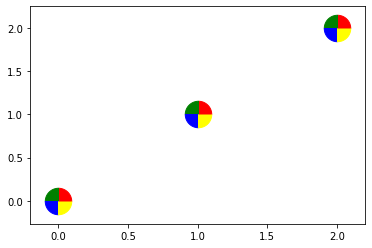

In [32]:
#Define markers

# Shallow marker
x1 = np.cos(np.linspace(0, np.pi / 2))
y1 = np.sin(np.linspace(0, np.pi / 2))
top_right = np.row_stack([[0, 0], np.column_stack([x1, y1])])

# Shallow dupe marker
x2= np.cos(np.linspace(np.pi / 2, np.pi))
y2 = np.sin(np.linspace(np.pi / 2, np.pi))
top_left = np.row_stack([[0, 0], np.column_stack([x2, y2])])

# Deep marker
x3 = np.cos(np.linspace(np.pi, 3 * np.pi / 2))
y3 = np.sin(np.linspace(np.pi, 3 * np.pi / 2))
bottom_left = np.row_stack([[0, 0], np.column_stack([x3, y3])])

# Deep dupe marker
x4 = np.cos(np.linspace(3 * np.pi / 2, 2 * np.pi))
y4 = np.sin(np.linspace(3 * np.pi / 2, 2 * np.pi))
bottom_right = np.row_stack([[0, 0], np.column_stack([x4, y4])])

fig, ax = plt.subplots()
# Scatter shallow
ax.scatter(range(3), range(3), marker=top_right, s=700, facecolor='red')
# Scatter shallow dupe
ax.scatter(range(3), range(3), marker=top_left, s=700, facecolor='green')
# Scatter deep
ax.scatter(range(3), range(3), marker=bottom_left, s=700, facecolor='blue')
# Scatter deep dupe
ax.scatter(range(3), range(3), marker=bottom_right, s=700, facecolor='yellow')

plt.show()

In [5]:
# Format the data for graphing
by_station_deep = pd.DataFrame(columns = ['STAT_ID', 'LATITUDE', 'LONGITUDE', 'TOP_LEFT', 'TOP_RIGHT', 'BOTTOM_RIGHT', 'BOTTOM_LEFT'])
by_station_shallow =  pd.DataFrame(columns = by_station_deep.columns)

variable = 'TCO2 in (mmol/kgSW)'

row = 0
by_station = s.groupby('STAT_ID')
for name, group in by_station:
    lat = group.iloc[0]['LATITUDE']
    lon = group.iloc[0]['LONGITUDE']

    by_station_deep.loc[row, 'LATITUDE'] = lat
    by_station_deep.loc[row, 'LONGITUDE'] = lon

    by_station_shallow.loc[row, 'LATITUDE'] = lat
    by_station_shallow.loc[row, 'LONGITUDE'] = lon

    by_station_deep.loc[row, 'STAT_ID'] = name
    by_station_shallow.loc[row, 'STAT_ID'] = name

    shallow = group[group['DEPTH (m)'] < 3]
    deep = group[group['DEPTH (m)'] > 19]

      #print(shallow)
    if len(shallow) == 0:
      if len(deep > 0):
        print('HELLO')

      if len(deep) == 0:
        continue

      elif len(deep) == 1:
        deep_row = deep.iloc[0]
        by_station_deep.loc[row, 'TOP_LEFT'] = deep_row[variable]
        by_station_deep.loc[row, 'TOP_RIGHT'] = deep_row[variable]
        by_station_deep.loc[row, 'BOTTOM_RIGHT'] =  deep_row[variable]
        by_station_deep.loc[row, 'BOTTOM_LEFT'] =   deep_row[variable]
      
      elif len(deep) == 2:
        deep_row = deep.iloc[0]
        deep_dupe = deep.iloc[1]
        by_station_deep.loc[row, 'TOP_LEFT'] = deep_dupe[variable]
        by_station_deep.loc[row, 'BOTTOM_LEFT'] = deep_dupe[variable]
        by_station_deep.loc[row, 'TOP_RIGHT'] = deep_dupe[variable]
        by_station_deep.loc[row, 'BOTTOM_RIGHT'] = deep_dupe[variable]

      else:
        print('Error: more than 2 deep values')
        break
    elif len(shallow) == 1:
      shallow_row = shallow.iloc[0]
      if len(deep) == 0:
        by_station_shallow.loc[row, 'TOP_LEFT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'TOP_RIGHT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'BOTTOM_RIGHT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'BOTTOM_LEFT'] = shallow_row[variable]

      elif len(deep) == 1:
        deep_row = deep.iloc[0]
        by_station_shallow.loc[row, 'TOP_LEFT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'TOP_RIGHT'] = shallow_row[variable]
        by_station_deep.loc[row, 'BOTTOM_RIGHT'] = deep_row[variable]
        by_station_deep.loc[row, 'BOTTOM_LEFT'] = deep_row[variable]

      elif len(deep) == 2:
        deep_row = deep.iloc[0]
        deep_dupe = deep.iloc[1]
        by_station_shallow.loc[row, 'TOP_LEFT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'TOP_RIGHT'] = shallow_row[variable]
        by_station_deep.loc[row, 'BOTTOM_LEFT'] = deep_row[variable]
        by_station_deep.loc[row, 'BOTTOM_RIGHT'] = deep_dupe[variable]
    elif len(shallow) == 2:
      shallow_row = shallow.iloc[0]
      shallow_dupe = shallow.iloc[1]
      if len(deep) == 0:
        by_station_shallow.loc[row, 'TOP_LEFT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'TOP_RIGHT'] = shallow_dupe[variable]
        by_station_shallow.loc[row, 'BOTTOM_RIGHT'] = shallow_dupe[variable]
        by_station_shallow.loc[row, 'BOTTOM_LEFT'] = shallow_row[variable]
      elif len(deep) == 1:
        deep_row = deep.iloc[0]
        by_station_shallow.loc[row, 'TOP_LEFT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'TOP_RIGHT'] = shallow_dupe[variable]
        by_station_deep.loc[row, 'BOTTOM_LEFT'] = deep_row[variable]
        by_station_deep.loc[row, 'BOTTOM_RIGHT'] = deep_row[variable]
      elif len(deep) == 2:
        deep_row = deep.iloc[0]
        deep_dupe = deep.iloc[1]
        by_station_shallow.loc[row, 'TOP_LEFT'] = shallow_row[variable]
        by_station_shallow.loc[row, 'TOP_RIGHT'] = shallow_dupe[variable]
        by_station_deep.loc[row, 'BOTTOM_LEFT'] = deep_row[variable]
        by_station_deep.loc[row, 'BOTTOM_RIGHT'] = deep_dupe[variable]
    row += 1

In [6]:
# Drop the nans
top_left_shallow = by_station_shallow.dropna(subset=['TOP_LEFT'])
top_right_shallow = by_station_shallow.dropna(subset=['TOP_RIGHT'])
bottom_left_shallow = by_station_shallow.dropna(subset=['BOTTOM_LEFT'])
bottom_right_shallow = by_station_shallow.dropna(subset=['BOTTOM_RIGHT'])

top_left_deep = by_station_deep.dropna(subset=['TOP_LEFT'])
top_right_deep = by_station_deep.dropna(subset=['TOP_RIGHT'])
bottom_left_deep = by_station_deep.dropna(subset=['BOTTOM_LEFT'])
bottom_right_deep = by_station_deep.dropna(subset=['BOTTOM_RIGHT'])

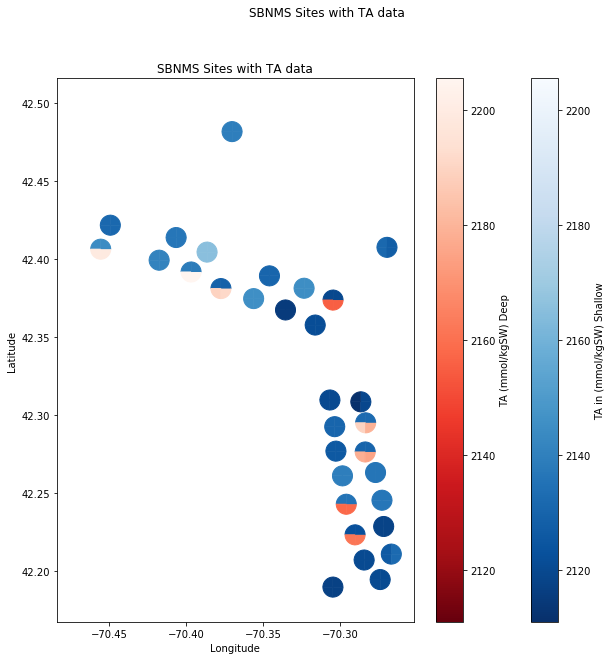

In [10]:
# Fill the whole circle if a shallow/deep is not available, use different color scale for each
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('SBNMS Sites with TA data')

# Get the max and min DIC values
min_ta = s['TA in (mmol/kgSW)'].min()
max_ta =  s['TA in (mmol/kgSW)'].max()

# Plot the shallow segments
s1 = ax.scatter(
  top_left_shallow['LONGITUDE'],
   top_left_shallow['LATITUDE'],
    c=top_left_shallow['TOP_LEFT'],
     vmin=min_ta,
      vmax = max_ta,
       cmap = 'Blues_r',
        marker=top_left,
         s = 400)
s2 = ax.scatter(
  top_right_shallow['LONGITUDE'],
   top_right_shallow['LATITUDE'],
    c=top_right_shallow['TOP_RIGHT'],
     vmin=min_ta,
      vmax = max_ta,
       cmap = 'Blues_r',
        marker=top_right,
         s = 400)
s3 = ax.scatter(
  bottom_left_shallow['LONGITUDE'],
    bottom_left_shallow['LATITUDE'],
      c=bottom_left_shallow['BOTTOM_LEFT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Blues_r',
              marker=bottom_left,
                s = 400)
s4 = ax.scatter(
  bottom_right_shallow['LONGITUDE'],
    bottom_right_shallow['LATITUDE'],
      c=bottom_right_shallow['BOTTOM_RIGHT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Blues_r',
              marker=bottom_right,
                s = 400)

# Set the colorbar
cbar1 = plt.colorbar(s1, ax=ax)
cbar1.set_label('TA in (mmol/kgSW) Shallow')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Plot the deep segments
d1 = ax.scatter(
  top_left_deep['LONGITUDE'],
    top_left_deep['LATITUDE'],
      c=top_left_deep['TOP_LEFT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Reds_r',
              marker=top_left,
                s = 400)
d2 = ax.scatter(top_right_deep['LONGITUDE'],
    top_right_deep['LATITUDE'],
      c=top_right_deep['TOP_RIGHT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Reds_r',
              marker=top_right,
                s = 400)
d3 = ax.scatter(
  bottom_left_deep['LONGITUDE'],
    bottom_left_deep['LATITUDE'],
      c=bottom_left_deep['BOTTOM_LEFT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Reds_r',
              marker=bottom_left,
                s = 400)
d4 = ax.scatter(
  bottom_right_deep['LONGITUDE'],
    bottom_right_deep['LATITUDE'],
      c=bottom_right_deep['BOTTOM_RIGHT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Reds_r',
              marker=bottom_right,
                s = 400)

# Add the colorbar
cbar2 = plt.colorbar(d1, ax=ax)
cbar2.set_label('TA (mmol/kgSW) Deep')

ax.set_title('SBNMS Sites with TA data')

plt.show()

In [35]:
# Format the data for graphing method 2
by_station_out = pd.DataFrame(columns = ['STAT_ID', 'LATITUDE', 'LONGITUDE', 'TOP_LEFT', 'TOP_RIGHT', 'BOTTOM_RIGHT', 'BOTTOM_LEFT'])

variable = 'TCO2 in (mmol/kgSW)'

row = 0
by_station = s.groupby('STAT_ID')
for name, group in by_station:
    lat = group.iloc[0]['LATITUDE']
    lon = group.iloc[0]['LONGITUDE']

    by_station_out.loc[row, 'LATITUDE'] = lat

    by_station_out.loc[row, 'LONGITUDE'] = lon

    by_station_out.loc[row, 'STAT_ID'] = name

    shallow = group[group['DEPTH (m)'] < 3]
    deep = group[group['DEPTH (m)'] > 19]

      #print(shallow)
    if len(shallow) == 1:
        by_station_out.loc[row, 'TOP_LEFT'] = shallow.iloc[0][variable]
        by_station_out.loc[row, 'TOP_RIGHT'] = shallow.iloc[0][variable]
    elif len(shallow) == 2:
        by_station_out.loc[row, 'TOP_LEFT'] = shallow.iloc[0][variable]
        by_station_out.loc[row, 'TOP_RIGHT'] = shallow.iloc[1][variable]
    
    if len(deep) == 1:
        by_station_out.loc[row, 'BOTTOM_LEFT'] = deep.iloc[0][variable]
        by_station_out.loc[row, 'BOTTOM_RIGHT'] = deep.iloc[0][variable]
    elif len(deep) == 2:
        by_station_out.loc[row, 'BOTTOM_LEFT'] = deep.iloc[0][variable]
        by_station_out.loc[row, 'BOTTOM_RIGHT'] = deep.iloc[1][variable]
        
    row += 1

In [36]:
# Drop the nans
top_left_data = by_station_out.dropna(subset=['TOP_LEFT'])
top_right_data = by_station_out.dropna(subset=['TOP_RIGHT'])
bottom_left_data = by_station_out.dropna(subset=['BOTTOM_LEFT'])
bottom_right_data = by_station_out.dropna(subset=['BOTTOM_RIGHT'])

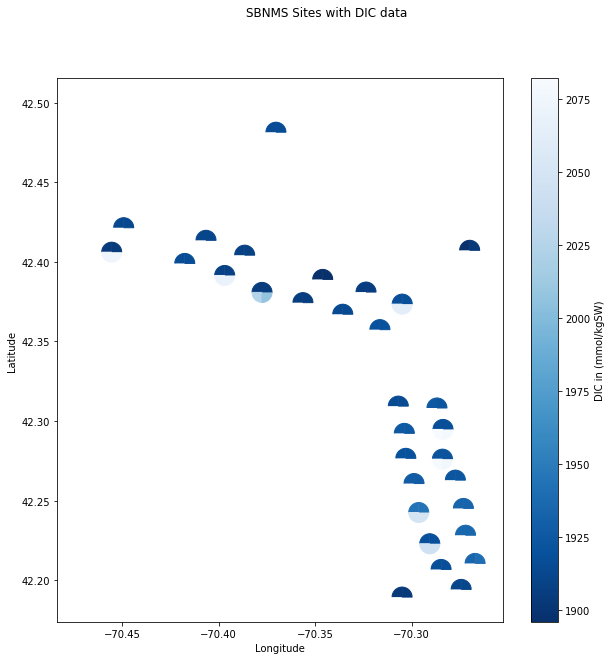

In [37]:
# Fill the whole circle if a shallow/deep is not available, use different color scale for each
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('SBNMS Sites with DIC data')

# Get the max and min DIC values
min_ta = s['TCO2 in (mmol/kgSW)'].min()
max_ta =  s['TCO2 in (mmol/kgSW)'].max()

# Plot the shallow segments
s1 = ax.scatter(
  top_left_data['LONGITUDE'],
   top_left_data['LATITUDE'],
    c=top_left_data['TOP_LEFT'],
     vmin=min_ta,
      vmax = max_ta,
       cmap = 'Blues_r',
        marker=top_left,
         s = 400)
         
s2 = ax.scatter(
  top_right_data['LONGITUDE'],
   top_right_data['LATITUDE'],
    c=top_right_data['TOP_RIGHT'],
     vmin=min_ta,
      vmax = max_ta,
       cmap = 'Blues_r',
        marker=top_right,
         s = 400)

s3 = ax.scatter(
  bottom_left_data['LONGITUDE'],
    bottom_left_data['LATITUDE'],
      c=bottom_left_data['BOTTOM_LEFT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Blues_r',
              marker=bottom_left,
                s = 400)

s4 = ax.scatter(
  bottom_right_data['LONGITUDE'],
    bottom_right_data['LATITUDE'],
      c=bottom_right_data['BOTTOM_RIGHT'],
        vmin=min_ta,
          vmax = max_ta,
            cmap = 'Blues_r',
              marker=bottom_right,
                s = 400)
# Set the colorbar

cbar1 = plt.colorbar(s1, ax=ax)
cbar1.set_label('DIC in (mmol/kgSW)')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()